## Imports


In [1]:
#Imports for plotting and data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings

#Hides annoying warning messages
warnings.filterwarnings('ignore')

#IMports for machine learning/problem 2
import sklearn.linear_model as sk

## Question 1: Network Revenue Management

An airline company offers 8 different itineraries presented in the table below. There are only four flight legs: Bos-Chi, NYC-Chi, Chi-SF, Chi-LA
and each itinerary is using one or two of these flight legs. There is one aircraft per leg and all planes have 200 seats. The table presents the demand for each itinerary for two fare classes: the low fare (Q-class) and high fare (Y-class).

### 1

We would like to determine the optimal way to allocate the seats of each leg. Write an
optimization problem that maximizes the total revenue. Solve the optimization problem
using a solver (e.g. Gurobi, OR tools, etc) and report the optimal revenue.

In [2]:
#Runs the optimizer.py file
%run optimizer.py

Set parameter Username
Academic license - for non-commercial use only - expires 2023-10-06
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[rosetta2])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 20 rows, 16 columns and 40 nonzeros
Model fingerprint: 0x2e114f57
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+02, 6e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+01, 2e+02]
Presolve removed 16 rows and 0 columns
Presolve time: 0.06s
Presolved: 4 rows, 16 columns, 24 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.2725000e+05   5.062500e+01   0.000000e+00      0s
       6    1.8228000e+05   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.08 seconds (0.00 work units)
Optimal objective  1.822800000e+05

Optimal Objective: 182280.0

Optimal Solution:
x0 25.0
x1 20.0
x2 25.0
x3 40.0
x4 65.0
x5 25.0
x6 19.0
x7 16.0
x8 44.0
x9 50.0
x1

Therefor the optimal value is 182280

### 2

If you can add one seat on one leg, which leg would it be?

In [11]:
def LastNlines(fname, N=20):
    """Prints the last N lines of a file
    Parameters:
            fname (str): name of file
            N (int): number of lines to print
    Returns:
        Text to be read
    """
    try:
        with open(fname) as file:
            # loop to iterate over last n lines and print them
            for line in (file.readlines()[-N:]):
                print(line, end='')
    except FileNotFoundError:
        print('File not found')

In [12]:
#Defines the text file 
fname = 'duals.txt'

#Calls the print text file function 
LastNlines(fname)

c0 160.0
c1 250.0
c2 160.0
c3 200.0
d0 40.0
d1 70.0
d2 0.0
d3 100.0
d4 40.0
d5 130.0
d6 0.0
d7 40.0
d8 0.0
d9 140.0
d10 0.0
d11 100.0
d12 40.0
d13 70.0
d14 50.0
d15 100.0


To find this we look at the constraints and see that c1 is 250 and so there is the most oppurtunity for increased profit between NYC-CHI 

## Question 2: Pricing using a linear demand function

For this question, we use the data set in Demand.xlsx. Suppose the demand function is linear: d(p) = a −bp, a, b > 0

### 1

Use the data in Demand.xlsx to estimate a, b using linear regression.

In [13]:
#Read in the data
df_prob= pd.read_excel('/Users/wdaugherty/Cornell_Tech_ORIE/ORIE-5132/HW_2/data/Demand.xlsx') 

#Defines the model 
model= sk.LinearRegression().fit(np.array(df_prob['price']).reshape((-1,1)),np.array(df_prob['Demand']))

#Prints out the answers for both a and b
print('a is %.2f, b is %.2f'%(model.intercept_,-model.coef_[0])) 


a is 395.32, b is 1.98


In [23]:
def plot_demand_model(excel_file_path):
    # Read in the data
    df_prob = pd.read_excel(excel_file_path)

    # Define the model 
    model = sk.LinearRegression().fit(np.array(df_prob['price']).reshape((-1,1)),np.array(df_prob['Demand']))

    # Print out the answers for both a and b
    print('a is %.2f, b is %.2f'%(model.intercept_,-model.coef_[0]))

    # Plot the model and the data
    plt.scatter(df_prob['price'], df_prob['Demand'], color='black')
    plt.plot(df_prob['price'], model.predict(np.array(df_prob['price']).reshape((-1,1))), color='blue', linewidth=3)
    plt.xlabel('Price')
    plt.ylabel('Demand')
    plt.title('Demand vs. Price')
    plt.show()

a is 395.32, b is 1.98


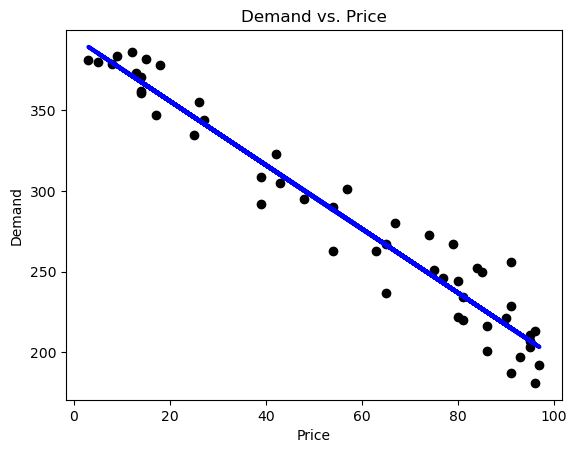

In [24]:
plot_demand_model('/Users/wdaugherty/Cornell_Tech_ORIE/ORIE-5132/HW_2/data/Demand.xlsx')


### 2 
Find the optimal price p<sup>∗</sup> that maximizes the expected revenue.

In [14]:
#Finds the optimal price
print('Revenue optimizing price= $%.2f' %(model.intercept_/(2*(-model.coef_[0]))))

Revenue optimizing price= $99.84


## Question 3: Empirical Willingness-to-pay distribution

In the file InSample.xlsx, you are given data {(p1, y1), . . . , (pN , yN )}, where pi is the price offered for a product and yi is the indicator
function of whether the product was sold at price pi. Suppose the willingness of paying this product is a random variable W ∼ cdf F (·), here cdf refers to the cumulative density function of W .




### 1
Use the data in InSample.xlsx to estimate the cdf F (·). Note F is a stair-wise function in this case. Draw a rough sketch to depict the function.

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

def wtp_fbar(df, p):
    """Willingness to pay (WTP)

    Parameters:
        df (DataFrame): Dataframe containing the data
        p (float): Price
    
    Returns:
        float: WTP
    """
    # Define buy and no buy variables
    # Calculate the number of buyers and non-buyers
    buyers = df.loc[(df['p_i'] >= p) & (df['y_i'] == 1)].shape[0]
    non_buyers = df.loc[(df['p_i'] <= p) & (df['y_i'] == 0)].shape[0]

    # Calculate the WTP

    fbar = (buyers / (non_buyers + buyers))
    return fbar

def wtp_cdf(df, p):
    """Willingness to pay (WTP)

    Parameters:
        df (DataFrame): Dataframe containing the data
        p (float): Price
    
    Returns:
        float: WTP
    """
    # Define buy and no buy variables
    # Calculate the number of buyers and non-buyers
    buyers = df.loc[(df['p_i'] >= p) & (df['y_i'] == 1)].shape[0]
    non_buyers = df.loc[(df['p_i'] <= p) & (df['y_i'] == 0)].shape[0]

    # Calculate the WTP
    cdf = 1 - (buyers / (non_buyers + buyers))
    return cdf

def plot_wtp(df):
    """Plot WTP curve

    Parameters:
        df (DataFrame): Dataframe containing the data
    
    Returns:
        None
    """
    lsx = []
    lsy = []
    for i in range(max(df['p_i'] + 1)):
        lsx.append(i)

        lsy.append(wtp_cdf(df, i))

    # Plot the results
    plt.step(lsx, lsy)
    plt.xlabel('p_i')
    plt.ylabel('Cumulative Probability (F(p_i))')
    plt.title('Estimated CDF')
    plt.show()
    


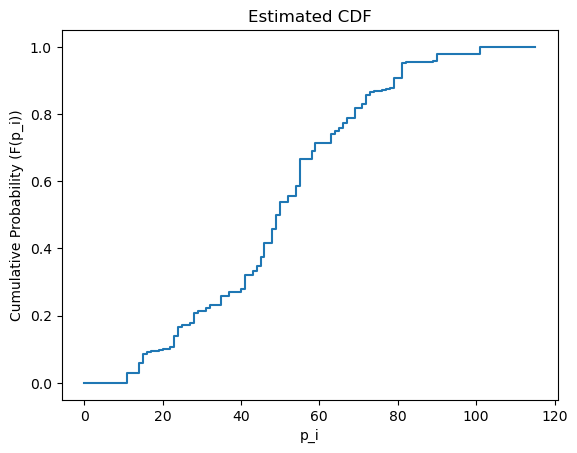

In [18]:
#loads in the data
df_in = pd.read_excel('/Users/wdaugherty/Cornell_Tech_ORIE/ORIE-5132/HW_2/data/InSample.xlsx')

#Calls the plot_wtp function function 
plot_wtp(df_in)

### 2

Find the optimal price p∗that maximizes the expected revenue. Suppose W1, . . . , WN are the
willingness-to-pay data points in InSample.xlsx. Then expected revenue for any price p can
be expressed as <br>

<br> where 1(·) is an indicator function that evaluates to 1 if the condition is true and 0 otherwise.

In [19]:
def calculate_optimal_p(df):
    """
    Calculates the optimal value of p using the expected revenue formula
    
    Parameters:
    df (pandas.DataFrame): a dataframe containing columns 'p' and 'y'
    
    Returns:
    float: the optimal value of p
    """
    
    # Calculate the empirical distribution function of the data
    #x = np.sort(df['p_i'].values)
    y = [(i * wtp_fbar(df,i)) for i in range(max(df['p_i']+1))]
    x = range(len(y))
    # Find the value of p that maximizes expected revenue
    optimal_p = np.argmax(y)
    
    # Plot the expected revenue curve
    plt.plot(x, y)
    plt.axvline(optimal_p, color='red')
    plt.xlabel('p')
    plt.ylabel('Expected Revenue')
    plt.title('Expected Revenue Curve')
    plt.show()
    
    return optimal_p


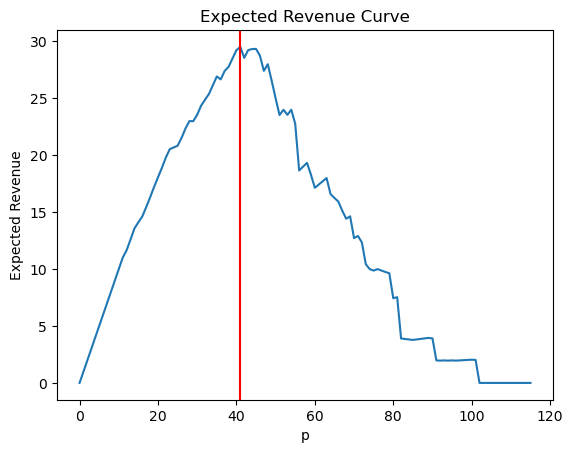

41

In [20]:
#Calls the calculate_optimal_p function
calculate_optimal_p(df_in)

### 3 

The file OutOfSample.xlsx contains willingness-to-pay data points. Each data point represents
the willingness-to-pay of a certain customer. Suppose p<sup>∗</sup>is the optimal price computed in
the previous question. Compute the revenue obtained by p<sup>∗</sup>if the actual demand is given by
data in OutOfSample.xlsx.

In [21]:
#Loads in the data 
df_out = pd.read_excel('/Users/wdaugherty/Cornell_Tech_ORIE/ORIE-5132/HW_2/data/OutOfSample.xlsx', header=0, names=['WTP'])

#Finds the optimal revenue
def revenue_optimal_p(df, optimal_p):
    """Compute the revenue obtained by using the optimal price p*

    Parameters:
        df (DataFrame): Dataframe containing the data
        optimal_p (float): Optimal price
    
    Returns:
        float: Revenue
    """
    # Compute the revenue obtained by using the optimal price p*
    revenue = (df['WTP'] >= optimal_p).sum() * optimal_p
    
    return print(f"The revenue obtained by using the optimal price p* is: {revenue}")

revenue_optimal_p(df_out,41)

The revenue obtained by using the optimal price p* is: 1025
